In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib notebook

In [74]:
a = [np.ones((10,2)) for i in range(3)]
b = [np.ones((10,2)) for i in range(3)]

In [80]:
np.concatenate(a+b, axis=1).shape

(10, 12)

In [158]:
path = '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458901/'

infile = open(path + 'galaxy_on_power' , 'rb')
galaxy_on = pickle.load(infile)
infile.close()

infile = open(path + 'galaxy_off_power' , 'rb')
galaxy_off = pickle.load(infile)
infile.close()

infile = open(path + 's_on_power' , 'rb')
s_on = pickle.load(infile)
infile.close()

infile = open(path + 's_off_power' , 'rb')
s_off = pickle.load(infile)
infile.close()

In [159]:
galaxy_on  = np.array([np.median(galaxy_on[i*7:(i+1)*7]) for i in range(int(15800/7))])
galaxy_off = np.array([np.median(galaxy_off[i*7:(i+1)*7]) for i in range(int(15800/7))])

In [160]:
times, freqs = get_times_and_freqs(int(15800/7), 62.5e6/15)

In [161]:
62.5e6/15/15800*7

1845.9915611814345

<IPython.core.display.Javascript object>


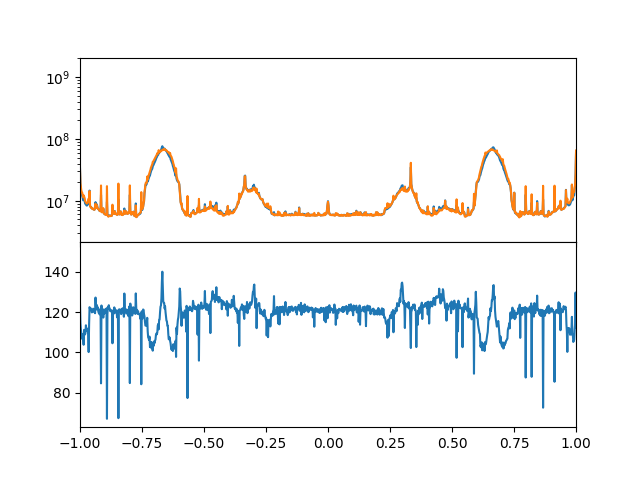

(-1, 1)

In [162]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0})
ax1.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(galaxy_on))
ax1.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(galaxy_off))

ax2.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(G*galaxy_on/galaxy_off))
ax1.set_xlim(-1, 1)

In [5]:
def get_data(data_path, JD):
    
    files = sorted(glob.glob(data_path+JD+'/*'))
    data = []
    for file in files:
        infile = open(file, 'rb')
        data.append(pickle.load(infile))
        infile.close()
    return data, files
def get_power(data_real, data_image=None):
    if data_image is not None:
        data = data_real+ 1.0j*data_image
    else:
        data = data_real
    return np.abs(np.fft.fft(data)**2)

def get_fft(data_real, data_image=None):
    if data_image is None:
        return np.fft.fft(data_real)
    else:
        return np.fft.fft(data_real+1.0j*data_image)
    
def get_times_and_freqs(N, sample_rate):
    times = np.linspace(0, N/sample_rate, N)
    freqs = np.fft.fftfreq(len(times), np.mean(np.diff(times)))
    return times, freqs

In [6]:
# put the path to the data folder here including the JD
path = '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/'

In [10]:
# Now import the data by day for example the ssb test signals are on day 245890
JD = '2458901'

# we can import all data from the day using the get_data() function
caps, cap_files               =  get_data(path+'captures/', JD)
args, _                       =  get_data(path+'args/', JD)
coords, _                     =  get_data(path+'coordinates/', JD)


In [11]:
times, _                      =  get_data(path+'times/', JD)

In [12]:
#So what files did we bring in?
cap_files

['/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458901/cap_0-82_test_s_off',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458901/cap_0-82_test_s_on']

In [18]:
s_on['real']

array([-12.51221896, 275.2688172 , 588.0742913 , ..., 137.6344086 ,
       450.4398827 ,   0.        ])

In [29]:
s_on = caps[-1]
s_off=caps[0]

s_on_power = np.median([get_power(s_on['real'][i], s_on['imaginary'][i]) for i in range(len(s_on['real']))], axis=0)
s_off_power = np.median([get_power(s_off['real'][i], s_off['imaginary'][i]) for i in range(len(s_on['real']))], axis=0)

In [30]:
15800/4

3950.0

In [31]:
s_on_power = np.median(s_on_power.reshape(3950, 4), axis=1)
s_off_power = np.median(s_off_power.reshape(3950, 4), axis=1)

In [32]:
times, freqs = get_times_and_freqs(3950, 62.5e6/15)

<IPython.core.display.Javascript object>


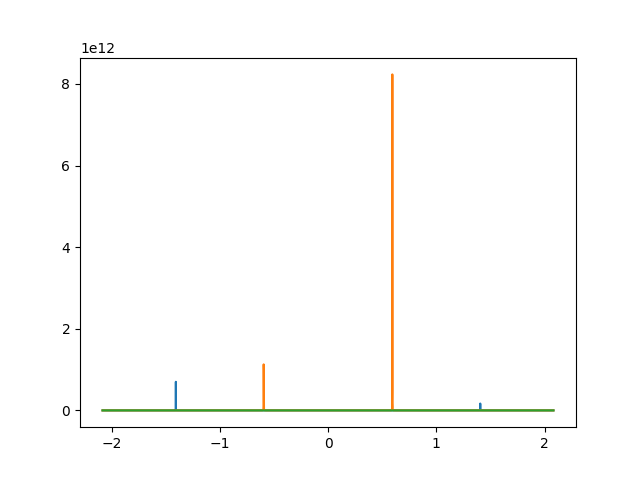

In [34]:
plt.figure()
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(s_off_power))
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(s_on_power))

plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(s_on_power/s_off_power))

In [154]:
#Now we have all the captures, args, coords, and times of the data. 
args[0]

Namespace(alt=32.1, az=307.0, dec=None, divisor=15, iterations=100, lat=None, lat_loc=37.873199, long=None, nblocks=1, path='/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/', ra=None, volt_range='50mV')

In [155]:
for time_type, time in times[2]['final'].items():
    print('initial ' + time_type + ' time is {}'.format(time))
print('\n')
for time_type, time in times[0]['initial'].items():
    print('final ' + time_type + ' time is {}'.format(time))

initial local time is Thu Feb 20 19:56:07 2020
initial ut time is 1582257367.9353087
initial julian time is 2458900.6639807327
initial lst time is 1.5240671332634472


final local time is Thu Feb 20 19:43:58 2020
final ut time is 1582256638.611999
final julian time is 2458900.6555394907
final lst time is 1.4708840268914987


In [12]:
coords[0]

{'initial': {'ra': 64.35025690166185,
  'dec': 51.22401826428793,
  'alt': 307.0,
  'az': 32.1,
  'lat': 1.1286107335767044,
  'long': 107.25518886065126},
 'final': {'ra': 64.35025690166185,
  'dec': 51.22401826428793,
  'alt': 307.0,
  'az': 32.1,
  'lat': 1.1769488323562867,
  'long': 107.1578709827275}}

In [14]:
#So we can see our sample rate
sample_rate = 62.5e6/15
N = 15800

times, freqs = get_times_and_freqs(N, sample_rate)

In [14]:
coords[2]

{'initial': {'ra': 64.35025690166185,
  'dec': 51.22401826428793,
  'alt': 307.0,
  'az': 32.1,
  'lat': 1.7618669314718989,
  'long': 106.03648948393084},
 'final': {'ra': 64.35025690166185,
  'dec': 51.22401826428793,
  'alt': 307.0,
  'az': 32.1,
  'lat': 1.814755006391519,
  'long': 105.93981522927488}}

In [15]:
62.5e6/1.6e8

0.390625

In [57]:
#Make the power
lower_test = caps[2]
upper_test = caps[3]
lower_power = get_power(caps[2]['real'][0], caps[2]['imaginary'][0])
upper_power = get_power(caps[3]['real'][0], caps[3]['imaginary'][0])

<IPython.core.display.Javascript object>


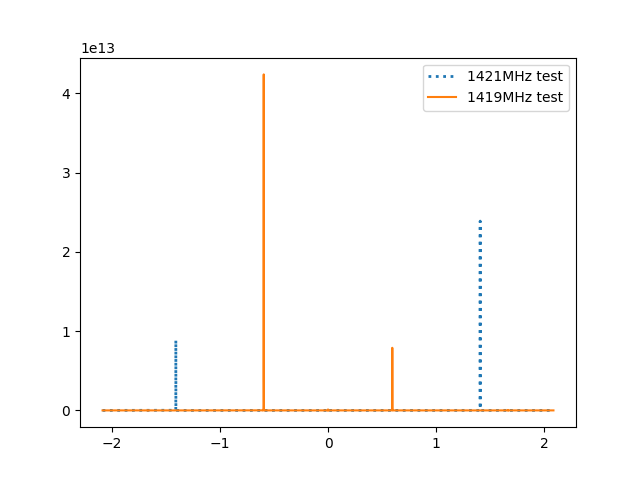

In [58]:
plt.figure()
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(upper_power), ':', lw=2, label='1421MHz test')
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(lower_power), label='1419MHz test')
# plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(s_on_power_avg/s_off_power_avg))
plt.legend()
# plt.xlim(-3, 3)


In [18]:
len(caps[2]['real'])

100

In [70]:
#We took 2files for the s_on and s_off each containing 50 iterations of 100 blocks (5000 blocks each file)
s_on = {'real': caps[2]['real']+caps[2]['real'], 'imaginary': caps[2]['imaginary'] + caps[2]['imaginary']}
s_on_power = [get_power(s_real, s_image) for s_real, s_image in zip(s_on['real'], s_on['imaginary'])]

s_off = {'real': caps[3]['real']+caps[3]['real'], 'imaginary': caps[3]['imaginary'] + caps[3]['imaginary']}
s_off_power = [get_power(s_real, s_image) for s_real, s_image in zip(s_off['real'], s_off['imaginary'])]

In [66]:
s_on_power = [get_power(real, imaginary) for real, imaginary in zip(caps[0]['real'], caps[0]['imaginary'])]
s_off_power = [get_power(real, imaginary) for real, imaginary in zip(caps[1]['real'], caps[1]['imaginary'])]

In [67]:
#Power averaging over bnlocks
s_on_avg = np.mean([power for power in s_on_power], axis=0)
s_off_avg = np.mean([power for power in s_off_power], axis=0)

In [68]:
s_on_median = np.median([power for power in s_on_power], axis=0)
s_off_median = np.median([power for power in s_off_power], axis=0)

<IPython.core.display.Javascript object>


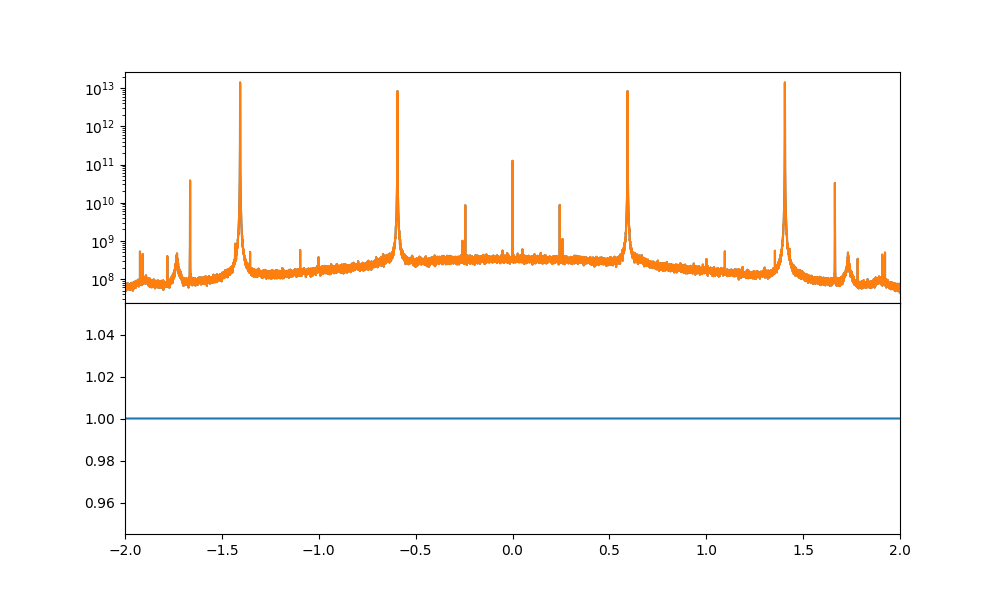

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0}, figsize=(10,6))
ax1.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(s_on_avg))
ax1.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(s_off_avg))
ax1.set_xlim(-2,2)

ax2.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift((s_on_avg/s_off_avg)))
# ax2.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(s_on_median/s_off_median))

# ax2.set_ylim(-1, 4)
plt.savefig('sonsoff.pdf')

In [64]:
#Can we average over frequencies?
s_on_avg_over_freqs  = np.array([np.mean(s_on_avg[x*5:(x+1)*5]) for x in range(int(15800/5))])
s_off_avg_over_freqs = np.array([np.mean(s_off_avg[x*5:(x+1)*5]) for x in range(int(15800/5))])

In [30]:
#Can we average over frequencies?
s_on_median_over_freqs  = np.array([np.mean(s_on_median[x*5:(x+1)*5]) for x in range(int(15800/5))])
s_off_median_over_freqs = np.array([np.mean(s_off_median[x*5:(x+1)*5]) for x in range(int(15800/5))])

In [31]:
new_times, new_freqs = get_times_and_freqs(int(15800/5), sample_rate)

In [32]:
np.median(np.diff(new_freqs))

1318.14813331197

<IPython.core.display.Javascript object>


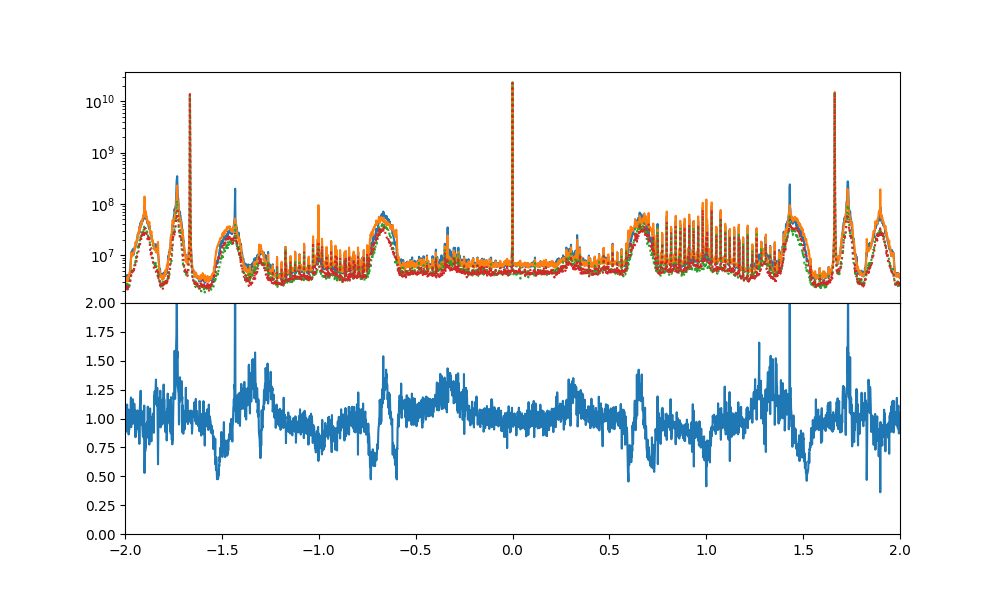

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0}, figsize=(10,6))
ax1.semilogy(np.fft.fftshift(new_freqs/1e6), np.fft.fftshift(s_on_avg_over_freqs), label='s on avg over freqs')
ax1.semilogy(np.fft.fftshift(new_freqs/1e6), np.fft.fftshift(s_off_avg_over_freqs), label='s off median over freqs')
ax1.semilogy(np.fft.fftshift(new_freqs/1e6), np.fft.fftshift(s_on_median_over_freqs), ':',label='s on avg over freqs')
ax1.semilogy(np.fft.fftshift(new_freqs/1e6), np.fft.fftshift(s_off_median_over_freqs), ':',label='s off median over freqs')
ax1.set_xlim(-2,2)
# ax1.legend()
ax2.plot(np.fft.fftshift(new_freqs/1e6), np.fft.fftshift(s_on_avg_over_freqs/s_off_avg_over_freqs))
# ax2.plot(np.fft.fftshift(new_freqs/1e6), np.fft.fftshift(s_on_median_over_freqs/s_off_median_over_freqs))

ax2.set_ylim(0, 2)
plt.savefig('')

In [34]:
cal_cold = caps[4]
cal_hot = caps[5]

s_cold = get_power(cal_cold['real'][0], cal_cold['imaginary'][0])
s_cal = get_power(cal_hot['real'][0], cal_hot['imaginary'][0])

<IPython.core.display.Javascript object>


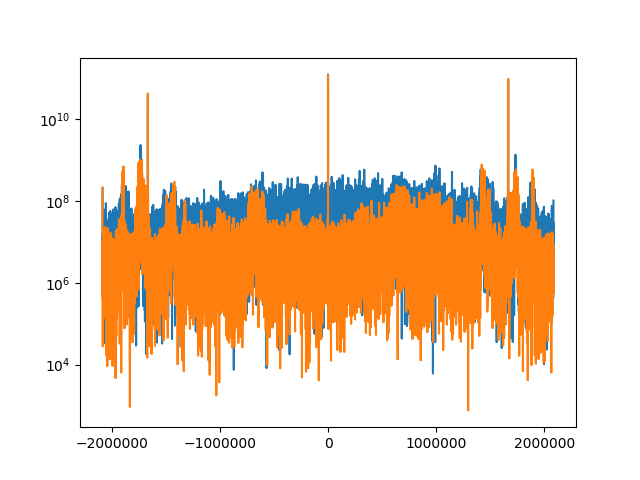

In [35]:
plt.figure()
plt.semilogy(np.fft.fftshift(freqs), np.fft.fftshift(s_cal))
plt.semilogy(np.fft.fftshift(freqs), np.fft.fftshift(s_cold))

In [56]:
G*(np.median(s_cal)-np.median(s_cold))/np.median(s_cold)

380.45190708831586

In [121]:
G = 300/np.median(s_cal-s_cold)*np.median(s_cold)

<IPython.core.display.Javascript object>


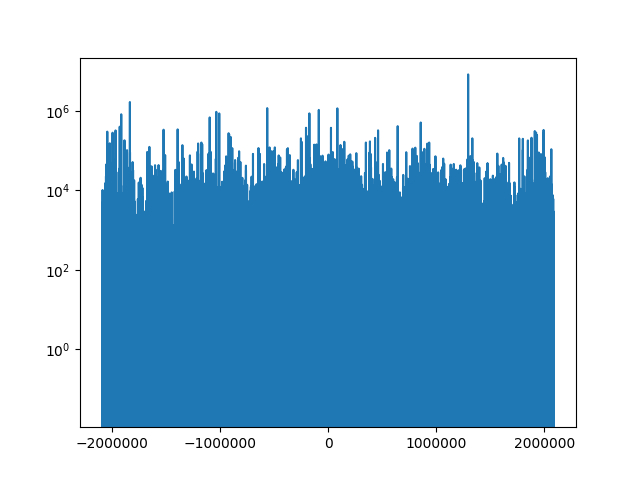

359.9738621337709
3983.2733323419825


In [52]:
test = G*(s_cal-s_cold)/s_cold
plt.figure()
plt.semilogy(np.fft.fftshift(freqs),np.fft.fftshift(test))
print(np.median(test))
print(np.mean(test))

In [39]:
s_line = G *s_on_avg_over_freqs/s_off_avg_over_freqs

<IPython.core.display.Javascript object>


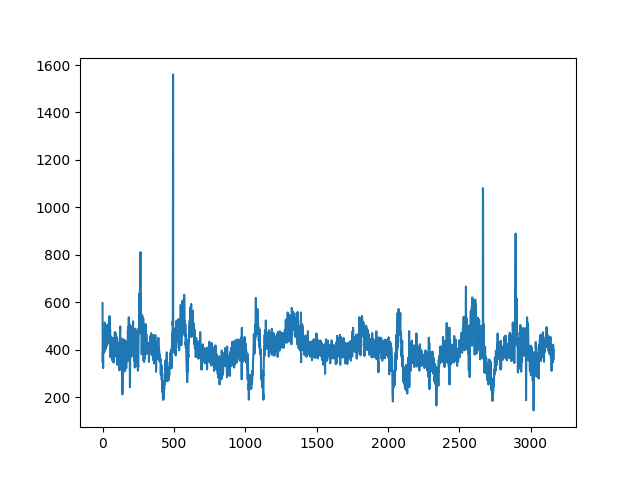

In [40]:
plt.figure()
plt.plot(np.fft.fftshift(s_line))

In [240]:
%matplotlib inline